## Plotly

In [1]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [2]:
full = pd.read_csv("data/energy_and_dorm_capacity.csv")

C:\Users\eaber\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning:

Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.



In [122]:
print(list(full.columns))
valuable_subset = ['MeterID', 'CurrentValue', 'Time', 'Building', 'Unit', 'Resource', 'BuildingName', 'GrossSquareFeet', 'BuildDate', 'Campus', 'Organization', 'LocationType', 'ActivationDate', 'NumOccupants']
full.loc[(full.BuildingName == "Siebert Hall") & (full.Time.str.contains("2018-12-31")), valuable_subset]

['MeterID', 'CurrentValue', 'ValueString', 'Time', 'Building', 'Unit', 'Status', 'StatusCode', 'BuildingID', 'Description', 'Units', 'Resource', 'BuildingName', 'GrossSquareFeet', 'BuildDate', 'Latitude', 'Longitude', 'Campus', 'Organization', 'LocationType', 'SteamSourceID', 'ChilledWaterSourceID', 'HotWaterSourceID', 'ActivationDate', 'DormName', 'OnePR', 'TwoPR', 'ThreePR', 'FourPR', 'NumOccupants']


,MeterID,CurrentValue,Time,Building,Unit,Resource,BuildingName,GrossSquareFeet,BuildDate,Campus,Organization,LocationType,ActivationDate,NumOccupants
92803,OSU_RTS.MDBUS_RH.099_HHF,1460.649900,2018-12-31T00:00:00Z,SIEBERT HW HEAT FLOW,KBTU/HR,Heating Hot Water,Siebert Hall,85839.0,1957-07-01,Main,SDL,Student Housing,2016-12-31T23:59:58Z,161.0
93533,OSU_RTS.MDBUS_RH.099_SHF,200.563479,2018-12-31T00:00:00Z,SIEBERT STEAM HEAT FLW,KBTU/HR,Steam,Siebert Hall,85839.0,1957-07-01,Main,SDL,Student Housing,2016-12-31T23:59:58Z,161.0
141493,OSU_RTS.MDBUS_RH.099_EC,0.000000,2018-12-31T00:00:00Z,SIEBERT ELEC CONS,kWh,Electricity,Siebert Hall,85839.0,1957-07-01,Main,SDL,Student Housing,2016-12-31T23:59:57Z,161.0


## Plotting

### One-axis plots

### All resources on one plot

In [20]:
x = full.Resource[(full.BuildingName == "Scott House") & (full.Time.str.contains("2018-12-30"))]
y = full.CurrentValue[(full.BuildingName == "Scott House") & (full.Time.str.contains("2018-12-30"))]

fig = go.Figure(data=[go.Bar(x = x, y = y)])

fig.update_traces(marker_color = 'rgb(158, 202, 225)', marker_line_color='rgb(8, 48, 107)', marker_line_width = 1.5, opacity =0.6)
fig.update_layout(title_text = 'Scott House')
fig.show()

### One resource per plot

In [19]:
for building in full.BuildingName.unique()[0:3]:
    for date in full[full.BuildingName == building].Time.str.slice(0, 10).unique()[0:3]:
        for trace in ["Electricity", "Heating Hot Water", "Chilled Water", "Steam"]:
#             # Default values to test without looping:
#             building = "Scott House"
#             date = "2018-12-30"
#             trace = "Electricity"
            if len(full.Resource[(full.BuildingName == building) & (full.Time.str.slice(0, 10) == date) & (full.Resource == trace)]) == 0:
                print("No %s data for %s on %s" % (trace, building, date))
            else:
                x = full.Resource[(full.BuildingName == building) & (full.Time.str.contains(date))]
                y = full.CurrentValue[(full.BuildingName == building) & (full.Time.str.contains(date))]

                fig = go.Figure(data=[go.Bar(x = x, y = y)])
                
#                 # Y-lim & Units:
#                 min_e = min(full.CurrentValue[(full.BuildingName == building) & (full.Resource == trace)])
#                 max_e = max(full.CurrentValue[(full.BuildingName == building) & (full.Resource == trace)])
#                 units_e = full.Units[(full.BuildingName == building) & (full.Resource == trace)]
#                 fig.update_yaxes(title_text = "yaxis 1 title", range = [min_e, max_e], row = 1, col = 1)

                fig.update_traces(marker_color = 'rgb(158, 202, 225)', marker_line_color='rgb(8, 48, 107)', marker_line_width = 1.5, opacity = 0.6)
                fig.update_layout(title_text = building)
                fig.show()

No Heating Hot Water data for Bricker, John W, Hall on 2018-03-22
No Chilled Water data for Bricker, John W, Hall on 2018-03-22
No Steam data for Bricker, John W, Hall on 2018-03-22


No Heating Hot Water data for Bricker, John W, Hall on 2018-03-23
No Chilled Water data for Bricker, John W, Hall on 2018-03-23
No Steam data for Bricker, John W, Hall on 2018-03-23


No Heating Hot Water data for Bricker, John W, Hall on 2018-03-24
No Chilled Water data for Bricker, John W, Hall on 2018-03-24
No Steam data for Bricker, John W, Hall on 2018-03-24


No Heating Hot Water data for Oxley Hall on 2018-02-06
No Chilled Water data for Oxley Hall on 2018-02-06
No Steam data for Oxley Hall on 2018-02-06


No Heating Hot Water data for Oxley Hall on 2018-02-07
No Chilled Water data for Oxley Hall on 2018-02-07
No Steam data for Oxley Hall on 2018-02-07


No Heating Hot Water data for Oxley Hall on 2018-02-08
No Chilled Water data for Oxley Hall on 2018-02-08
No Steam data for Oxley Hall on 2018-02-08


No Heating Hot Water data for Kennedy, June F, Commons on 2017-01-01
No Chilled Water data for Kennedy, June F, Commons on 2017-01-01
No Steam data for Kennedy, June F, Commons on 2017-01-01


No Heating Hot Water data for Kennedy, June F, Commons on 2017-01-02
No Chilled Water data for Kennedy, June F, Commons on 2017-01-02
No Steam data for Kennedy, June F, Commons on 2017-01-02


No Heating Hot Water data for Kennedy, June F, Commons on 2017-01-03
No Chilled Water data for Kennedy, June F, Commons on 2017-01-03
No Steam data for Kennedy, June F, Commons on 2017-01-03


### Sub-plots EDA

In [5]:
full.BuildingName.unique()[0]

'Bricker, John W, Hall'

In [6]:
full.Time.str.slice(0, 10).unique()[0]

'2018-03-22'

In [7]:
full[(full.BuildingName == full.BuildingName.unique()[0]) & (full.Time == full.Time.str.slice(0, 10).unique()[0])]
# returns 0 rows but Electricity is plotted for Bricker on this date

,MeterID,CurrentValue,ValueString,Time,Building,Unit,Status,StatusCode,BuildingID,Description,...,SteamSourceID,ChilledWaterSourceID,HotWaterSourceID,ActivationDate,DormName,OnePR,TwoPR,ThreePR,FourPR,NumOccupants


### Sub-plots loop

In [120]:
for building in ["Siebert Hall"]: # full.BuildingName.unique()[0:3]: #
    for date in ["2018-12-31"]: # full[full.BuildingName == building].Time.str.slice(0, 10).unique()[0:3]: #
        x_y_df = full[(full.BuildingName == building) & (full.Time.str.contains(date))]

        no_data = True
        for trace in ["Electricity", "Heating Hot Water", "Chilled Water", "Steam"]:
            if len(x_y_df.Resource[(full.Resource == trace)]) != 0:
                no_data = False
        
        if no_data == True: 
            print("No data for %s on %s" % (building, date))
        else:
            fig = make_subplots(rows = 1, cols = 3)
            trace = "Electricity"
            min_e = min(full.CurrentValue[(full.BuildingName == building) & (full.Resource == trace)])
            max_e = max(full.CurrentValue[(full.BuildingName == building) & (full.Resource == trace)])
            fig.add_trace(
                go.Bar(x = x_y_df.Resource[(full.Resource == trace)], y = x_y_df.CurrentValue[(full.Resource == trace)]),
                row = 1, col = 1 # y axis = full.Unit
            )
            trace = "Heating Hot Water"
            min_hw = min(full.CurrentValue[(full.BuildingName == building) & (full.Resource == trace)])
            max_hw = max(full.CurrentValue[(full.BuildingName == building) & (full.Resource == trace)])
            fig.add_trace(
                go.Bar(x = x_y_df.Resource[(full.Resource == trace)], y = x_y_df.CurrentValue[(full.Resource == trace)]),
                row = 1, col = 2
            )
#             # No data on chilled water for Siebert Hall on 2018-12-31
#             trace = "Chilled Water"
#             min_cw = min(full.CurrentValue[(full.BuildingName == building) & (full.Resource == trace)])
#             max_cw = max(full.CurrentValue[(full.BuildingName == building) & (full.Resource == trace)])
#             fig.add_trace(
#                 go.Bar(x = x_y_df.Resource[(full.Resource == trace)], y = x_y_df.CurrentValue[(full.Resource == trace)]),
#                 row = 1, col = 3
#             )
            trace = "Steam"
            min_s = min(full.CurrentValue[(full.BuildingName == building) & (full.Resource == trace)])
            max_s = max(full.CurrentValue[(full.BuildingName == building) & (full.Resource == trace)])
            fig.add_trace(
                go.Bar(x = x_y_df.Resource[(full.Resource == trace)], y = x_y_df.CurrentValue[(full.Resource == trace)]),
                row = 1, col = 3 # changed bc no cw
            )
            
            fig.update_yaxes(range = [min_e, max_e], row = 1, col = 1)
            fig.update_yaxes(range = [min_hw, max_hw], row = 1, col = 2)
            fig.update_yaxes(range = [min_s, max_s], row = 1, col = 4)
            
#             fig.update_yaxes(title_text = "kWh", row = 1, col = 1)
#             fig.update_yaxes(title_text = "KBTU/HR", row = 1, col = 2)
#             fig.update_yaxes(title_text = "KBTU/HR", row = 1, col = 3)
#             fig.update_yaxes(title_text = "KBTU/HR", row = 1, col = 4)

            people = full.NumOccupants[full.BuildingName == building].head(1) # Learned: use head when first index is != 0
            fig.update_traces(marker_color = 'rgb(158, 202, 225)', marker_line_color = 'rgb(8, 48, 107)', marker_line_width = 1.5, opacity = 0.6)
            fig.update_layout(height = 600, width = 800, title_text = '%s Consumption on %s (%i occupants)' % (building, date, people))
            fig.show()
            

In [133]:
full[["CurrentValue", "NumOccupants", "OnePR", "TwoPR", "ThreePR", "FourPR"]].corr()["CurrentValue"]

CurrentValue    1.000000
NumOccupants    0.505139
OnePR           0.381248
TwoPR           0.525038
ThreePR        -0.106671
FourPR         -0.199658
Name: CurrentValue, dtype: float64

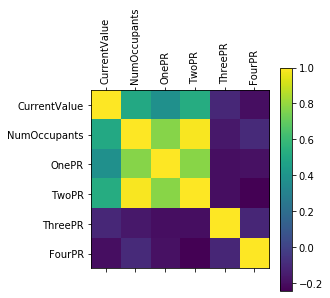

In [140]:
import matplotlib
import matplotlib.pyplot as plt
df = full[["CurrentValue", "NumOccupants", "OnePR", "TwoPR", "ThreePR", "FourPR"]]
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

## Finding one good example

In [89]:
no_nan = full.dropna()
for trace in ["Electricity", "Heating Hot Water", "Chilled Water", "Steam"]:
    print()
    print()
    print()
    print()
    print(trace)
    print(no_nan.loc[(no_nan.Resource == trace), valuable_subset].groupby(['BuildingName']).agg({'CurrentValue' : [np.min, np.max]}))





Electricity
                    CurrentValue              
                            amin          amax
BuildingName                                  
Park-Stradley Hall  7.000000e+00  1.157798e+07
Siebert Hall        0.000000e+00  4.378488e+06
Smith-Steeb Hall    7.143843e+06  1.145282e+07




Heating Hot Water
                 CurrentValue             
                         amin         amax
BuildingName                              
Siebert Hall         8.545071  2701.046022
Smith-Steeb Hall     0.000000  2461.390467




Chilled Water
Empty DataFrame
Columns: [(CurrentValue, amin), (CurrentValue, amax)]
Index: []




Steam
                   CurrentValue              
                           amin          amax
BuildingName                                 
Morrill Tower          0.020771    280.381926
Park-Stradley Hall    56.479432  12075.982519
Siebert Hall         122.536023   5856.118889


In [92]:
full[full.CurrentValue == 2701.046022]

,MeterID,CurrentValue,ValueString,Time,Building,Unit,Status,StatusCode,BuildingID,Description,...,SteamSourceID,ChilledWaterSourceID,HotWaterSourceID,ActivationDate,DormName,OnePR,TwoPR,ThreePR,FourPR,NumOccupants


In [57]:
for trace in ["Electricity", "Heating Hot Water", "Chilled Water", "Steam"]:
    print(full.loc[full.Resource == trace, ["Resource", "BuildingName", "Value"]])

           Resource           BuildingName  Value
0       Electricity  Bricker, John W, Hall    NaN
1       Electricity  Bricker, John W, Hall    NaN
2       Electricity  Bricker, John W, Hall    NaN
3       Electricity  Bricker, John W, Hall    NaN
4       Electricity  Bricker, John W, Hall    NaN
5       Electricity  Bricker, John W, Hall    NaN
6       Electricity  Bricker, John W, Hall    NaN
7       Electricity  Bricker, John W, Hall    NaN
8       Electricity  Bricker, John W, Hall    NaN
9       Electricity  Bricker, John W, Hall    NaN
10      Electricity  Bricker, John W, Hall    NaN
11      Electricity  Bricker, John W, Hall    NaN
12      Electricity  Bricker, John W, Hall    NaN
13      Electricity  Bricker, John W, Hall    NaN
14      Electricity  Bricker, John W, Hall    NaN
15      Electricity  Bricker, John W, Hall    NaN
16      Electricity  Bricker, John W, Hall    NaN
17      Electricity  Bricker, John W, Hall    NaN
18      Electricity  Bricker, John W, Hall    NaN


In [100]:
full[full.BuildingName == building].Time.str.slice(0, 10).tail()

141489    2018-12-27
141490    2018-12-28
141491    2018-12-29
141492    2018-12-30
141493    2018-12-31
Name: Time, dtype: object

In [101]:
for building in ["Siebert Hall"]: # full[full.LocationType == "Student Housing"].BuildingName.unique():
    print()
    print("For %s:" % building)
    for date in ["2018-12-31"]: # full[full.BuildingName == building].Time.str.slice(0, 10).unique()[500:510]:
#         print("On %s:" % date)
        all_data = True
        missing_trace = ""
        num_resources = 4
        for trace in ["Electricity", "Heating Hot Water", "Chilled Water", "Steam"]:
            if len(full[(full.BuildingName == building) & (full.Time.str.slice(0, 10) == date) & (full.Resource == trace)]) == 0:
                all_data = False
                missing_trace = "%s %s," % (missing_trace, trace)
                num_resources -= 1
#         print("Missing %s" % missing_trace)
        print("%i resource(s) on %s:" % (num_resources, date))
        if all_data:
            print("We have all data for %s on %s" % (building, date))


For Siebert Hall:
3 resource(s) on 2018-12-31:
